# Introduction

In this kernel I will go through......<br>
<br>
This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

# Data preparation

## Import libraries

In [2]:
# Data engineering.
import pandas as pd
import numpy as np

# Regular expressions module.
#import re

# Data visualization and frame's visualization options.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")

## Load data files

In [3]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

## Quick view at dataset

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [6]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Features

checking cardinality, nie biore pod uwage ID oraz target variable

In [7]:
from collections import OrderedDict
counts = {'Constant': OrderedDict(), 'Binary': OrderedDict(), 'Categorical': OrderedDict()}


for feat in [x for x in train_df.columns if 'X' in x]:    
    typ = train_df[feat].dtype
    uniq = len(np.unique(train_df[feat]))
    
    if uniq == 1:
        counts['Constant'][feat] = uniq 
    elif uniq == 2 and typ == np.int64:
        counts['Binary'][feat] = uniq
    else:
        counts['Categorical'][feat] = uniq

In [8]:
print('Constant features:', len(counts['Constant'].keys()))
print('Binary features:', len(counts['Binary'].keys()))
print('Categorical features:', len(counts['Categorical'].keys()))

Constant features: 12
Binary features: 356
Categorical features: 8


we have 12 features which only have a single value in them - these are pretty useless for supervised algorithms

## Target feature

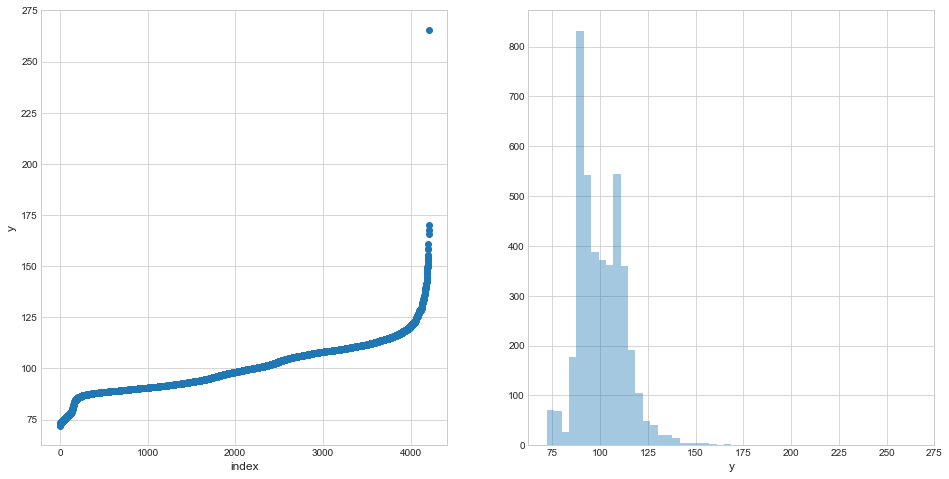

In [9]:
val = np.sort(train_df.y.values)

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.scatter(range(train_df.shape[0]), val)
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)

plt.subplot(122)
sns.distplot(val, bins=50, kde=False)
plt.xlabel('y', fontsize=12)

plt.show()

## Cleaning

- handling outliers and missing values

In [10]:
train_df = train_df[train_df['y'] < 200]

# Data exploration

## Factor levels distribution

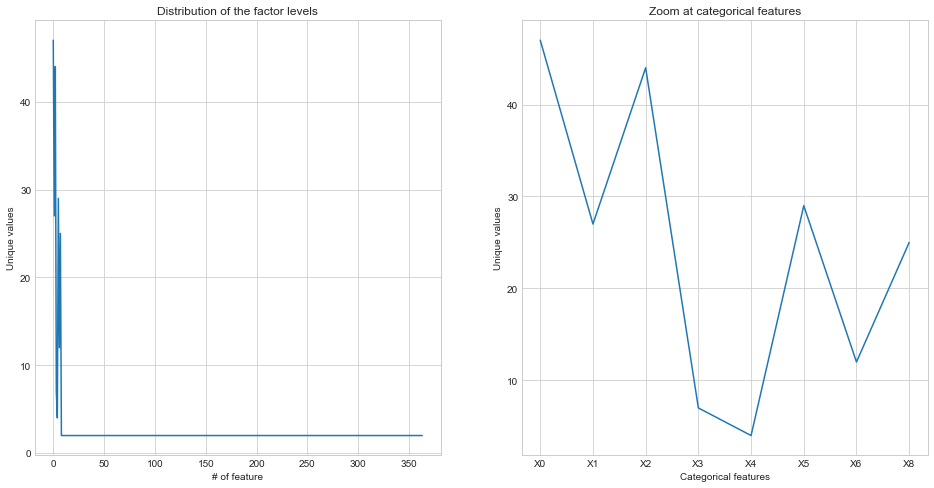

In [11]:
x = np.array(list(counts['Categorical'].values()) + list(counts['Binary'].values()))

fig = plt.figure(figsize=(16,8))

no1 = fig.add_subplot(121)
no1.plot(x)
no1.set_title('Distribution of the factor levels')
plt.xlabel('# of feature')
plt.ylabel('Unique values')


no2 = fig.add_subplot(122)
no2.plot(x[:8])
no2_labels = no2.get_xticks().tolist()
no2_labels[1:-1] = list(counts['Categorical'].keys())
no2.set_xticklabels(no2_labels)
no2.set_title('Zoom at categorical features')
plt.xlabel('Categorical features')
plt.ylabel('Unique values')


plt.show()

In [12]:
counts['Categorical']

OrderedDict([('X0', 47),
             ('X1', 27),
             ('X2', 44),
             ('X3', 7),
             ('X4', 4),
             ('X5', 29),
             ('X6', 12),
             ('X8', 25)])

## Features insight

- removing 0 variation features

In [13]:
counts['Constant'].keys()

odict_keys(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'])

In [14]:
test_df.drop(counts['Constant'].keys(), 1, inplace=True)
train_df.drop(counts['Constant'].keys(), 1, inplace=True)

## Binary features relations

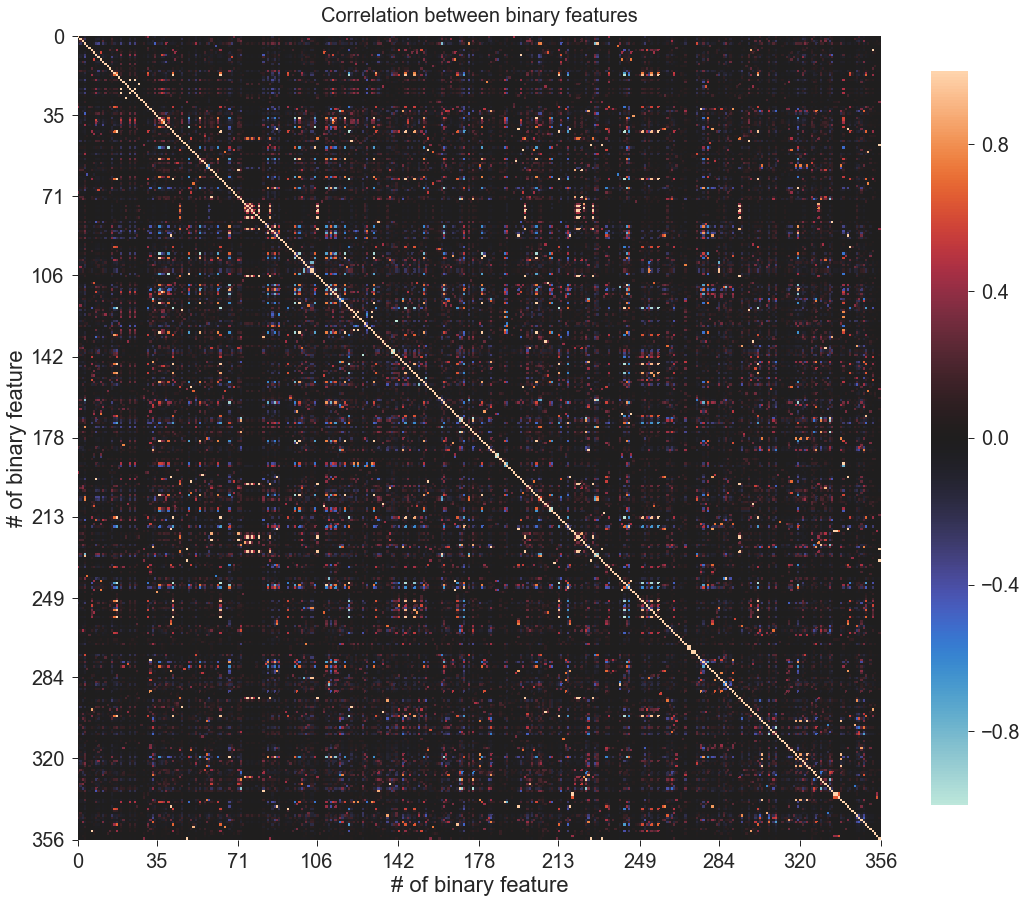

In [15]:
binary_df = train_df[list(counts['Binary'].keys())]
binary_corr_df = binary_df.corr()

rcstyle = {'axes.linewidth': 1.0, 'axes.edgecolor': 'black','ytick.minor.size': 5.0}
sns.set(font_scale=2.0)
sns.set_style('ticks', rcstyle)

plt.figure(figsize=(18,18))
plt.title('Correlation between binary features', y=1.01, size=20)

ax = sns.heatmap(binary_corr_df, vmin=-1, vmax=1, center=0, 
                 square=True, cbar_kws={"shrink": .75})

plt.xticks(rotation=0)
ax.set_xlabel('# of binary feature')
ax.set_xticks(np.linspace(0, binary_df.shape[1], 11, dtype=int))
ax.set_xticklabels(np.linspace(0.0, binary_df.shape[1], 11, dtype=int))

ax.set_ylabel('# of binary feature')
ax.set_yticks(np.linspace(0, binary_df.shape[1], 11, dtype=int))
ax.set_yticklabels(np.linspace(0.0, binary_df.shape[1], 11, dtype=int))

plt.show()

In [16]:
i, j = np.where(binary_corr_df.values > 0.9)

high_corr_df = pd.DataFrame({'corr': binary_corr_df.values[[i, j]], 'ind1': i, 'ind2': j, 'var1': binary_corr_df.columns[i], 'var2': binary_corr_df.columns[j]})
high_corr_df = high_corr_df[high_corr_df['ind1'] != high_corr_df['ind2']]

ind_val = high_corr_df[['ind1', 'ind2']].values
sort_val = []
for i in ind_val:
    sort_val.append(sorted(i))
    
q, w = np.unique(sort_val, axis=0, return_index=True)

high_corr_df = high_corr_df.iloc[w].sort_index()

In [17]:
high_corr_df.head(10)

,corr,ind1,ind2,var1,var2
4,0.932199,3,230,X14,X251
8,1.000000,6,352,X17,X382
11,0.994679,8,196,X19,X215
21,0.994274,17,42,X29,X54
22,0.994274,17,63,X29,X76
23,0.961902,17,145,X29,X162
24,1.000000,17,213,X29,X232
25,0.931650,17,250,X29,X272
26,0.943835,17,254,X29,X276
27,1.000000,17,257,X29,X279


## Categorical features relations

- implicit ordering of the categorical features
- http://www.statisticshowto.com/nominal-variable/
- https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
- https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix/39266194#39266194
- https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792

# Categorical features

## Train vs test feature levels

In [18]:
cat_feat_diff = OrderedDict()
cat_feat_uniq = OrderedDict()

for i in list(counts['Categorical'].keys()):
    
    uniq_train = train_df[i].unique()
    print('Feature {} in train_df dataset has {} unique values. Here is a full list:\n{}'.format(i, len(uniq_train), uniq_train))
    
    uniq_test = test_df[i].unique()
    print('Feature {} in test_df dataset has {} unique values. Here is a full list:\n{}\n'.format(i, len(uniq_test), uniq_test))
    
    x = [x for x in uniq_train if x not in uniq_test]
    y = [x for x in uniq_test if x not in uniq_train]
    
    cat_feat_uniq[i] = np.unique([*uniq_train, *uniq_test]).tolist()
    cat_feat_diff[i] = [x , y]    

Feature X0 in train_df dataset has 47 unique values. Here is a full list:
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
Feature X0 in test_df dataset has 49 unique values. Here is a full list:
['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']

Feature X1 in train_df dataset has 27 unique values. Here is a full list:
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
Feature X1 in test_df dataset has 27 unique values. Here is a full list:
['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']

Feature X2 in train_df dataset has 44 u

In [19]:
for i, j in cat_feat_diff.items():
    print('{} feature -  missing factor levels in training set: {} <{}>\
    \n{} feature -  missing factor levels in testing set: {} <{}>\n'.format(i, len(j[1]), j[1], i,  len(j[0]), j[0]))

X0 feature -  missing factor levels in training set: 6 <['av', 'ag', 'an', 'ae', 'p', 'bb']>    
X0 feature -  missing factor levels in testing set: 4 <['q', 'aa', 'ac', 'ab']>

X1 feature -  missing factor levels in training set: 0 <[]>    
X1 feature -  missing factor levels in testing set: 0 <[]>

X2 feature -  missing factor levels in training set: 6 <['aj', 'ax', 'ab', 'w', 'ad', 'u']>    
X2 feature -  missing factor levels in testing set: 5 <['l', 'aa', 'c', 'o', 'ar']>

X3 feature -  missing factor levels in training set: 0 <[]>    
X3 feature -  missing factor levels in testing set: 0 <[]>

X4 feature -  missing factor levels in training set: 0 <[]>    
X4 feature -  missing factor levels in testing set: 0 <[]>

X5 feature -  missing factor levels in training set: 4 <['t', 'b', 'a', 'z']>    
X5 feature -  missing factor levels in testing set: 1 <['u']>

X6 feature -  missing factor levels in training set: 0 <[]>    
X6 feature -  missing factor levels in testing set: 0 <[]>



## Most popular feature levels

In [20]:
# Aggregate values
agg_train = ['count', 'mean', 'std']

col_train = [['train_df']*3, ['count', 'mean', 'std']]
col_test = [('test_df', 'Feature levels'), ('test_df', 'count')]

columns = list(zip(*col_train))

tuple_creator = []

for i, j in list(cat_feat_uniq.items()):
    for factor in j:
        tuple_creator.append( (i, factor) )

# Train data frame
index = pd.MultiIndex.from_tuples(tuple_creator)
columns = pd.MultiIndex.from_tuples(columns)
train_feat = pd.DataFrame(columns=columns, index=index)

# Test data frame
test_feat = pd.DataFrame()

# Top5 feature levels for each categorical feature
count_df = pd.DataFrame()

for i in list(counts['Categorical'].keys()):
    # Preparing train_df data
    x = train_df[[i, 'y']].groupby(i).agg(agg_train).round(1)
    x.columns.set_levels(['train_df'], level=0, inplace=True)
    
    # Update
    train_feat.loc[i].update(x)
    
    # Preparing test_df data
    y = test_df[i].value_counts()
    y.index = pd.MultiIndex.from_product([[i], y.index])
    y = pd.DataFrame(y)
    y.columns = pd.MultiIndex.from_product([['test_df'], y.columns])
    y.rename(columns={i: 'count'}, inplace=True)

    # Update
    test_feat = pd.concat([test_feat, y])
    
    # Train data for top5 feature levels frame
    x = train_feat.loc[i].sort_values(by=[('train_df', 'count')], ascending=False)['train_df']
    x = x.reset_index()[:5].rename(columns={'index': 'Feature levels'})
    x.columns = pd.MultiIndex.from_product([['train_df'], x.columns])
    x.index = pd.MultiIndex.from_product([[i], x.index])
    
    # Test data for top5 feature levels frame
    y = y['test_df']
    y.index = y.index.droplevel(level=0)
    y = y.reset_index()[:5].rename(columns={'index': 'Feature levels'})
    y.columns = pd.MultiIndex.from_product([['test_df'], y.columns])
    y.index = pd.MultiIndex.from_product([[i], y.index])

    # Creating a data frame with top5 feature levels for each feature
    temp = pd.concat([x , y], axis=1)
    count_df = pd.concat([count_df , temp], axis=0)

    
# Merging train and test data frames
merg_df = pd.concat([train_feat, test_feat], axis=1)
merg_df.head(10)

train_df              test_df
         count   mean   std   count
X0 a        21  115.6   7.9    18.0
   aa        2  152.2  25.1     NaN
   ab        1  112.3   NaN     NaN
   ac        1   89.6   NaN     NaN
   ad       14   94.1     8    12.0
   ae      NaN    NaN   NaN     1.0
   af       35  112.8   6.3    34.0
   ag      NaN    NaN   NaN     1.0
   ai       34   95.8  14.2    38.0
   aj      151    104   8.8   162.0

## Feature levels frequency distributions

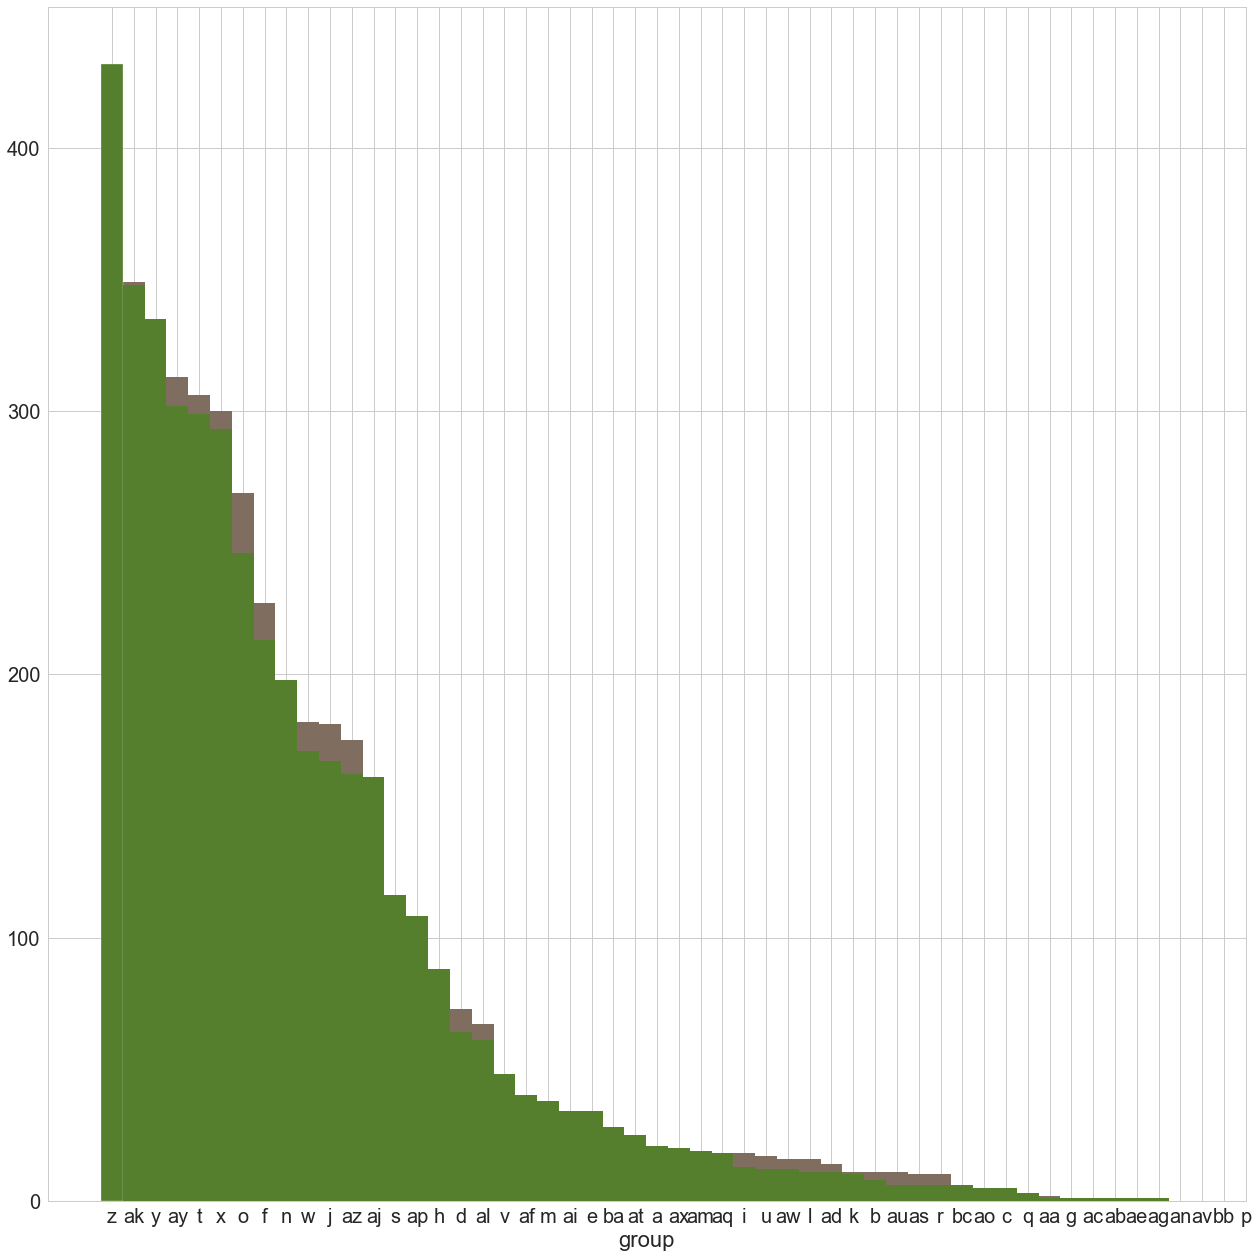

In [343]:
z = merg_df.loc['X0'][('train_df', 'count')].sort_values(ascending=False)
v = merg_df.loc['X0'][('test_df', 'count')].sort_values(ascending=False)
x = len(merg_df['test_df'].index.levels[1])
counter = merg_df['test_df']
y = np.arange(53)

plt.figure(figsize=(18,18))

plt.bar(y, z.values, color='#7f6d5f', edgecolor='white', width=1)
plt.bar(y, v.values, color='#557f2d', edgecolor='white', width=1)
plt.xticks(y, z.index)
plt.xlabel("group")
plt.tight_layout()

plt.show()

## Unique categorical features combinations

In [46]:
train_shape = train_df[list(counts['Categorical'].keys())].shape
test_shape = test_df[list(counts['Categorical'].keys())].shape

train_comb = train_df[list(counts['Categorical'].keys())].drop_duplicates().shape
test_comb = test_df[list(counts['Categorical'].keys())].drop_duplicates().shape

print('{} out of {} training data feature combinations are unique.'.format(train_comb[0], train_shape[0]))
print('{} out of {} testing data feature combinations are unique.'.format(test_comb[0], test_shape[0]))

3865 out of 4208 training data feature combinations are unique.
3868 out of 4209 testing data feature combinations are unique.


# Categorical features relations with target

## Features level reductions

In [250]:
def feat_lvl(feature, limit, limit_type=['lower', 'upper']):
    ''' Returns an array of target values of particular feature in train_df. 
        Limit argument defines occurences limit of feature levels.
    '''
    
    # Takes already made list of counted feature levels
    x = merg_df.loc[feature]['train_df']
    # Slices a feature list by given logistic condition
    if limit_type == 'lower':
        y = x[x['count'] >= limit].index
    else:
        y = x[x['count'] < limit].index
    
    return train_df[['y', feature]].set_index(feature).loc[y].values

freq_feat = np.concatenate(
    [feat_lvl(features, 100, limit_type='lower') for features in list(counts['Categorical'].keys())]
                            ).flatten()
rare_feat = np.concatenate(
    [feat_lvl(features, 100, limit_type='upper') for features in list(counts['Categorical'].keys())]
                            ).flatten()

## TODO - refactorization

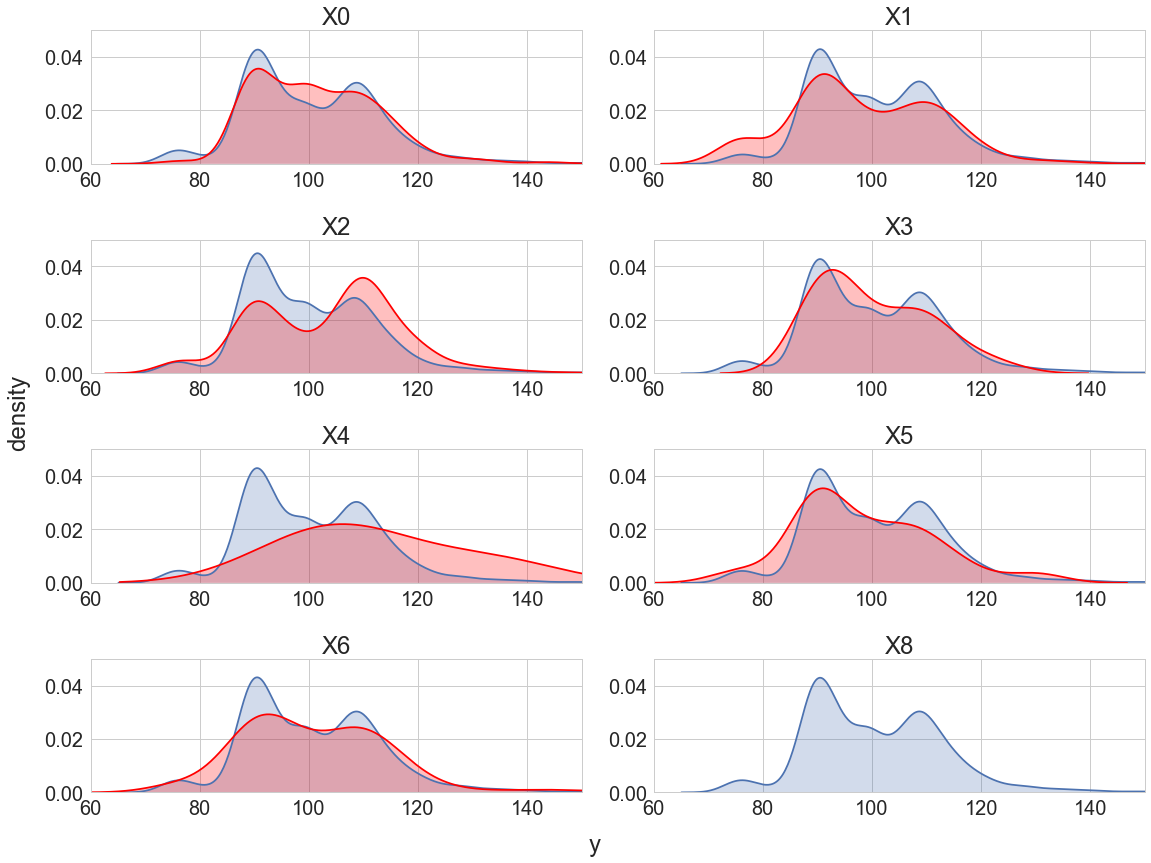

In [251]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(16,12))

subplot_items = [list(counts['Categorical'].keys()), [x for x in range(421,429)]]
subplot_pos = list(zip(*subplot_items))
subplot_pos = dict(subplot_pos)

for feat in list(counts['Categorical'].keys()):
    sub_plot = fig.add_subplot(subplot_pos[feat])
    
    sns.kdeplot(feat_lvl(feat, 100, limit_type='lower').flatten(), shade=True, gridsize=500)
    sns.kdeplot(feat_lvl(feat, 100, limit_type='upper').flatten(), shade=True, color='r', gridsize=500)
    
    sub_plot.set(xlim=(60, 150), ylim=(0, 0.05))
    sub_plot.set_title(feat)

fig.tight_layout()

fig.text(0, 0.5, 'density', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0, 'y', ha='center', va='center')

plt.show()

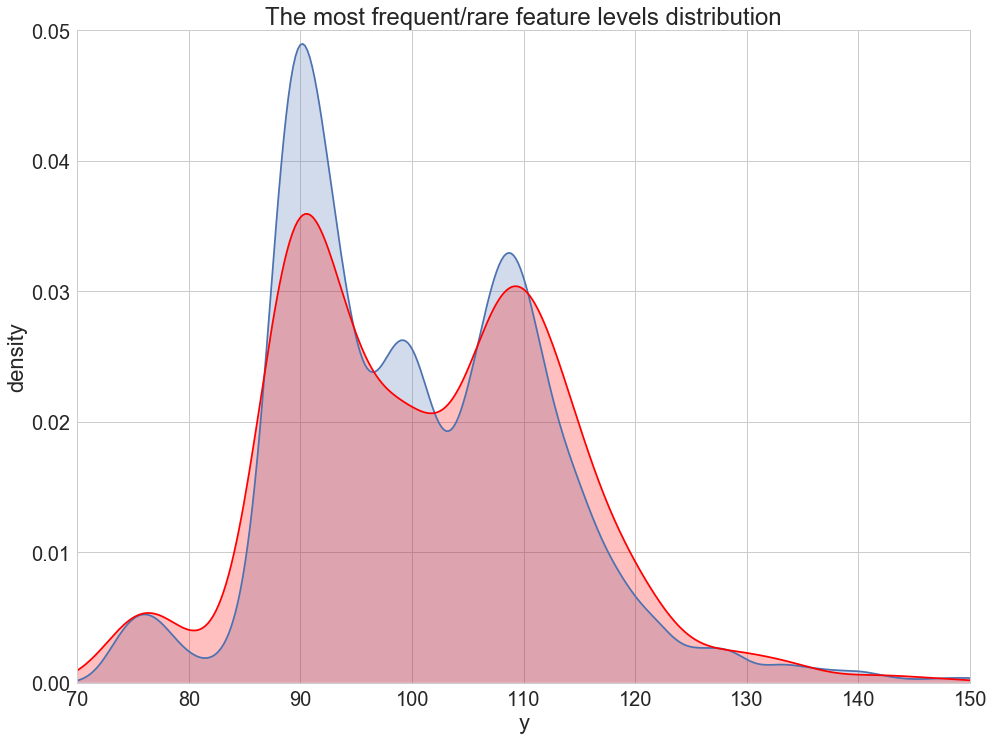

In [254]:
fig, ax = plt.subplots(figsize=(16, 12))

sns.kdeplot(freq_feat, shade=True, gridsize=500)
sns.kdeplot(rare_feat, shade=True, color='r', gridsize=500)

ax.set(xlim=(70, 150), ylim=(0, 0.05))
ax.set_title('The most frequent/rare feature levels distribution')
plt.xlabel('y')
plt.ylabel('density')

plt.show()

## Identifying redundant features

In [257]:
count_df.loc['X4']['train_df']

,Feature levels,count,mean,std
0,d,4204,100.6,12.4
1,a,2,101.1,6.2
2,b,1,112.8,NaN
3,c,1,134,NaN


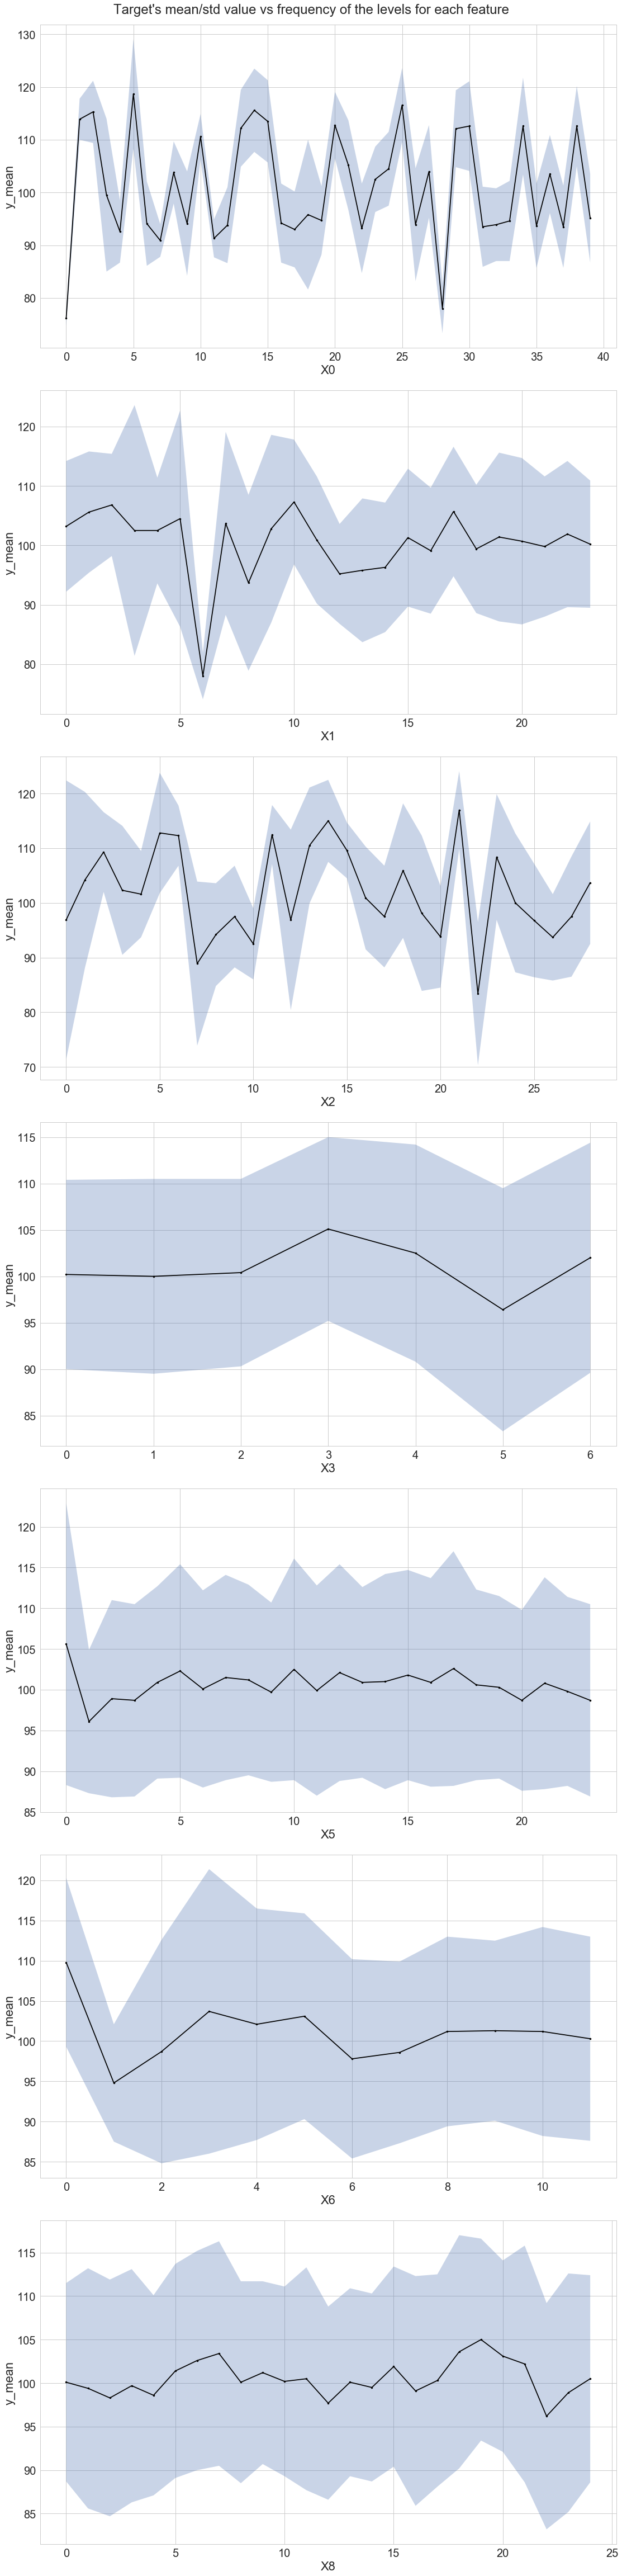

In [341]:
fig = plt.figure(figsize=(16,64))

# TODO function
dict_cat = counts['Categorical']
dict_cat.pop('X4', None)
subplot_items = [list(dict_cat.keys()), [x for x in range(711,718)]]
subplot_pos = list(zip(*subplot_items))
subplot_pos = dict(subplot_pos)


for feat in list(subplot_pos.keys()):
    
    subplot_var = fig.add_subplot(subplot_pos[feat])
    
    y = merg_df.loc[feat]['train_df']
    y = y[y['count'] > 5].sort_values(by='count')
    y = y.apply(pd.to_numeric, errors='ignore')
    
    ymean = y['mean'].values
    ystd = y['std'].values
    std_plus = ymean + ystd
    std_minus = ymean - ystd
    
    subplot_var.fill_between(np.arange(len(y)), std_minus, std_plus, alpha=0.3)
    subplot_var.plot(ymean, color='k', marker='.')
    
    plt.xlabel(feat)
    plt.ylabel('y_mean')

fig.text(0.5, 1, "Target's mean/std value vs frequency of the levels for each feature", 
         ha='center', va='center')
plt.tight_layout()
plt.show()

## X0 and X2 - feature level combinations